In [17]:
import main
import beacon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import pylab as pl
from sklearn import preprocessing

In [18]:
# boo = beacon.Faction.HonestFaction(74, "Honest", 0.5, 0.1, 0.3)
# poo = beacon.Faction.SmokeFaction(37, "Dishonest", 0.5, 0.1, 0.3)

In [19]:
def plot_game_ratio():
    """
    This function calculates the ratio of 0s and 1s in one game and draws the scatter plot
    """
    
    game = beacon.play(boo, poo)
    
    numberZeros = 0
    ratioZeros = 0
    ratioZeros_list = []
    for n in range(len(game)):
        if game[n][2] == 0:
            numberZeros += 1
        ratioZeros = numberZeros/(n+1)
        ratioZeros_list.append(ratioZeros)
    ratioOnes_list = [1-item for item in ratioZeros_list]
    
    plt.plot(range(111), np.ravel(ratioZeros_list), 'o', color = 'red')
    plt.plot(range(111), np.ravel(ratioOnes_list), 'o', color = 'blue')
    plt.ylabel('ratio')
    plt.xlabel('Number of votes')
    plt.title('The ratio for number of 0s and the ratio for number of 1s in one game')
    plt.legend(('0', '1'))
    
    plt.show()    

In [20]:
def plot_win_lose(n_simulations, boo, poo):
    """
    parameters: the number of games simulated
    
    This function calculates the number of wins and loses in n simulated games and draws the bar plot
    """
    stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]
    
    wins = 0
    for s in stats:
        if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
            wins += 1
        
    result = ('Win', 'Lose')
    y_pos = np.arange(len(result))
    performance = [wins, len(stats)-wins]
    
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.text(-0.05, len(stats)/2, wins)
    plt.text(0.95, len(stats)/2, len(stats)-wins)
    plt.xticks(y_pos, result)
    plt.ylabel('Result')
    plt.title('Number of Win & Lose for n simulated games')
    plt.show()
    
    
    return performance

In [21]:
def win_lose_ratio(n_simulations, n_ratio_compared):
    """
    parameters:
        n_simulations: The number of games simulated to obtain one ratio value
        n_ratio_compared: The number of ratio values
        
    This function calculates the ratio of wins and loses in n_simulations games, 
    then append each ratio (total of n_ratio_compared ratios) to the list
    """
    ratio_list = []
    
    for n in range(n_ratio_compared):
        ratio = 0
        stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]

        wins = 0
        for s in stats:
            if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
                wins += 1

        ratio = wins/len(stats)
        ratio_list.append(ratio)
    
    return ratio_list

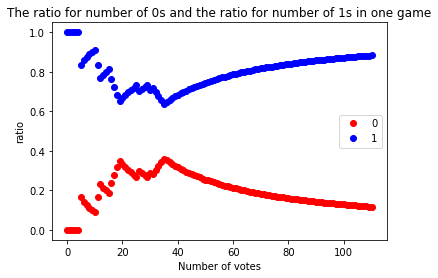

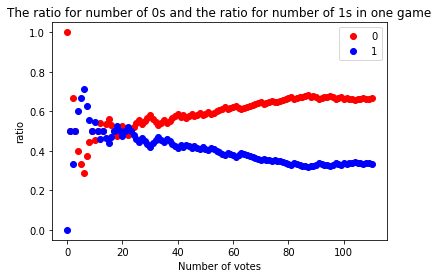

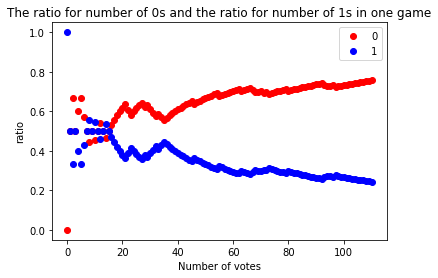

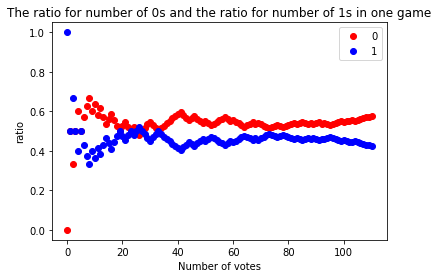

In [28]:
t_vote = 0.5
t_attack = [0.6,0.7,0.8,0.9]
error = [0]
latency = 0.5

for e in error:
        for t in t_attack:
            boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, e, latency)
            poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, e, latency)
            plot_game_ratio()

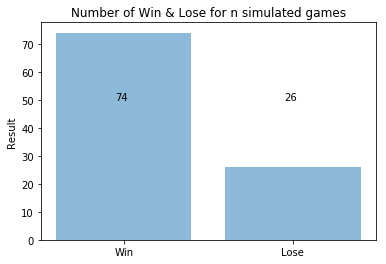

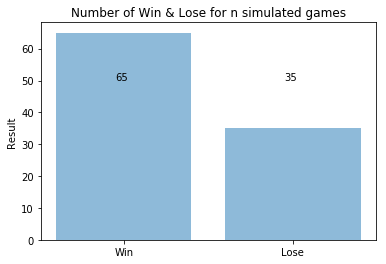

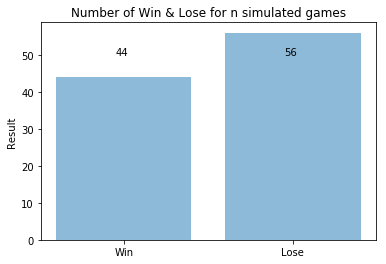

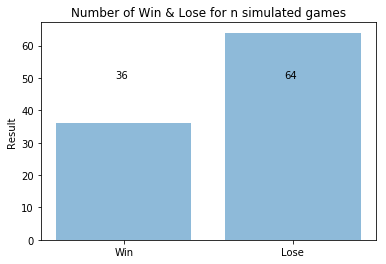

In [29]:
for e in error:
        for t in t_attack:
            boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, e, latency)
            poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, e, latency)
            plot_win_lose(100, boo, poo)

In [30]:
for e in error:
        for t in t_attack:
            boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, e, latency)
            poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, e, latency)
            #win_lose_ratio(10, 10)
            print(st.t.interval(0.95, len(win_lose_ratio(10, 10))-1, loc=np.mean(win_lose_ratio(10, 10)), scale=st.sem(win_lose_ratio(10, 10))))

(0.7388628400298493, 0.8811371599701506)
(0.40127762231228714, 0.698722377687713)
(0.45595671556690043, 0.7240432844330997)
(0.1630946233127936, 0.3769053766872065)


In [53]:
(0.93+0.85+0.75+0.58+0.52)/5

0.7260000000000001

In [54]:
(0.9256373097494277+0.85+0.83+0.68+0.62)/5

0.7811274619498856

In [55]:
(0.91+0.85+0.82+0.78+0.8)/5

0.8320000000000001

In [56]:
(0.88+0.9171780560299945+0.88+0.85+0.79)/5

0.863435611205999